<a href="https://colab.research.google.com/github/ToniRV/MIT_6.862_Applied_Machine_Learning/blob/master/MIT_6_036_HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MIT 6.036 Spring 2020: Homework 3#

This colab notebook provides code and a framework for problems 1-7 of the 
[ homework](https://lms.mitx.mit.edu/courses/course-v1:MITx+6.036+2019_Fall/courseware/Week3/week3_homework/).  You can work out your solutions here, then submit your results back on the homework page when ready.

## <section>**Setup**</section>

First, download the code distribution for this homework that contains test cases and helper functions.

Run the next code block to download and import the code for this lab.


In [169]:
!rm -rf code_and_data_for_hw3*
!rm -rf mnist
!wget --quiet https://introml.odl.mit.edu/cat-soop/_static/6.036/homework/hw03/code_and_data_for_hw3.zip
!unzip code_and_data_for_hw3.zip
!mv code_and_data_for_hw3/* .
  
from code_for_hw3_part1 import *
import code_for_hw3_part2 as hw3
import numpy as np

Archive:  code_and_data_for_hw3.zip
   creating: code_and_data_for_hw3/
   creating: code_and_data_for_hw3/mnist/
  inflating: code_and_data_for_hw3/mnist/mnist_train4.png  
  inflating: code_and_data_for_hw3/mnist/mnist_train5.png  
  inflating: code_and_data_for_hw3/mnist/mnist_train7.png  
  inflating: code_and_data_for_hw3/mnist/mnist_train6.png  
  inflating: code_and_data_for_hw3/mnist/mnist_train2.png  
  inflating: code_and_data_for_hw3/mnist/mnist_train3.png  
  inflating: code_and_data_for_hw3/mnist/mnist_train1.png  
  inflating: code_and_data_for_hw3/mnist/mnist_train0.png  
  inflating: code_and_data_for_hw3/mnist/mnist_train8.png  
  inflating: code_and_data_for_hw3/mnist/mnist_train9.png  
  inflating: code_and_data_for_hw3/code_for_hw3_part2.py  
replace __MACOSX/code_and_data_for_hw3/._code_for_hw3_part2.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Feature Transformation

## <section>**Running Perceptron**</section>

In problems 1,2 and 3, you will have to run the Perceptron algorithm several times to obtain linear classifiers.
We provide you with an implementation of the algorithm which you can use to obtain your results.

The specifications for the `perceptron` method provided are:
* `data` is a numpy array of dimension $d$ by $n$
* `labels` is numpy array of dimension $1$ by $n$
* `params` is a dictionary specifying extra parameters to this algorithm; your algorithm runs a number of iterations equal to $T$
* `hook` is either None or a function that takes the tuple `(th, th0)` as an argument and displays the separator graphically. 

It should return a tuple of $\theta$ (a $d$ by 1 array) and $\theta_0$ (a 1 by 1 array).

Note that you are free to modify the method. For example, a useful modification for this homework would be to make the method return the number of mistakes made on the input data, while it runs.

In [0]:
# Perceptron algorithm with offset.
# data is dimension d by n
# labels is dimension 1 by n
# T is a positive integer number of steps to run
def perceptron(data, labels, params = {}, hook = None):
    # if T not in params, default to 50
    T = params.get('T', 100)
    (d, n) = data.shape

    theta = np.zeros((d, 1)); theta_0 = np.zeros((1, 1))
    m = 0
    for t in range(T):
        for i in range(n):
            x = data[:,i:i+1]
            y = labels[:,i:i+1]
            if y * positive(x, theta, theta_0) <= 0.0:
                theta = theta + y * x
                theta_0 = theta_0 + y
                m += 1
                if hook: hook((theta, theta_0))
    print (m)
    return theta, theta_0

def averaged_perceptron(data, labels, params = {}, hook = None):
    T = params.get('T', 50)
    (d, n) = data.shape

    theta = np.zeros((d, 1)); theta_0 = np.zeros((1, 1))
    theta_sum = theta.copy()
    theta_0_sum = theta_0.copy()
    for t in range(T):
        for i in range(n):
            x = data[:,i:i+1]
            y = labels[:,i:i+1]
            if y * positive(x, theta, theta_0) <= 0.0:
                theta = theta + y * x
                theta_0 = theta_0 + y
                if hook: hook((theta, theta_0))
            theta_sum = theta_sum + theta
            theta_0_sum = theta_0_sum + theta_0
    theta_avg = theta_sum / (T*n)
    theta_0_avg = theta_0_sum / (T*n)
    if hook: hook((theta_avg, theta_0_avg))
    return theta_avg, theta_0_avg

  
def eval_classifier(learner, data_train, labels_train, data_test, labels_test):
    th, th0 = learner(data_train, labels_train)
    return score(data_test, labels_test, th, th0)/data_test.shape[1]

def positive(x, th, th0):
    return np.sign(th.T@x + th0)

def score(data, labels, th, th0):
    return np.sum(positive(data, th, th0) == labels)

def xval_learning_alg(learner, data, labels, k):
    _, n = data.shape
    idx = list(range(n))
    np.random.seed(0)
    np.random.shuffle(idx)
    data, labels = data[:,idx], labels[:,idx]

    score_sum = 0
    s_data = np.array_split(data, k, axis=1)
    s_labels = np.array_split(labels, k, axis=1)
    for i in range(k):
        data_train = np.concatenate(s_data[:i] + s_data[i+1:], axis=1)
        labels_train = np.concatenate(s_labels[:i] + s_labels[i+1:], axis=1)
        data_test = np.array(s_data[i])
        labels_test = np.array(s_labels[i])
        score_sum += eval_classifier(learner, data_train, labels_train,
                                              data_test, labels_test)
    return score_sum/k

In [0]:
data = np.array([[2, 3, 4, 5]])
labels = np.array([[1, 1, -1, -1]])

In [13]:
num_iterations = 10000 #TODO: change number of iterations
perceptron(data, labels, params = {'T':num_iterations}, hook = None)

29


(array([[-2.]]), array([[7.]]))

## <section>2D) Encoding Discrete Values</section>

It is common to encode sets of discrete values, for machine learning, not as a single multi-valued feature, but using a one hot encoding. So, if there are $k$ values in the discrete set, we would transform that single multi-valued feature into $k$ binary-valued features, in which feature $i$ has value $+1$ if the original feature value was $i$ and has value $0$ (or $-1$) otherwise.

Write a function `one_hot` that takes as input $x$, a single feature value (between $1$ and $k$), and $k$, the total possible number of values this feature can take on, and transform it to a numpy column vector of $k$ binary features using a one-hot encoding (remember vectors have zero-based indexing).

In [31]:
import numpy as np

def one_hot(x, k):
    one_hot = np.zeros((k, 1))
    one_hot[x - 1] = 1
    return one_hot
one_hot(2, 7)

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [19]:
test_one_hot(one_hot)

Passed! 



In [50]:
one_hot_data = np.concatenate(np.array([one_hot(x, 7) for x in data[0]]), 1)
th, th0 = perceptron(one_hot_data, labels, params = {'T':100000}, hook = None)

[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
6


In [54]:
np.dot(np.transpose(th), one_hot(7, 7)) + th0

array([[0.]])

In [65]:
one_hot_data = np.concatenate(np.array([one_hot(x, 6) for x in [i + 1 for i in range(6)]]), 1)
labels = np.array([[1, 1, -1, -1, 1, 1]])
print(one_hot_data)
th, th0 = perceptron(one_hot_data, labels, params = {'T':10000}, hook = None)
print(th)
print(th0)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
8
[[ 1.]
 [ 1.]
 [-2.]
 [-2.]
 [ 1.]
 [ 1.]]
[[0.]]


## 3) Polynomial Features

One systematic way of generating non-linear transformations of your input features is to consider the polynomials of increasing order.  Given a feature vector $x = [x_1, x_2, ..., x_d]^T$, we can map it into a new feature vector that contains all the factors in a polynomial of order $d$. For example, for $x = [x_1, x_2]^T$ and order 2, we get $$\phi(x) = [1, x_1, x_2, x_1x_2, x_1^2, x_2^2]^T$$ and for order 3, we get $$\phi(x) = [1, x_1, x_2, x_1x_2, x_1^2, x_2^2, x_1^2x_2, x_1x_2^2, x_1^3, x_2^3]^T.$$  

In the code that has been loaded, we have defined `make_polynomial_feature_fun` that, given the order, returns a feature transformation function (analogous to $\phi$ in the description).  You should use it in doing this problem.

In [66]:
## For example, make_polynomial_feature_fun could be used as follows:

# Generate transformation of order 2
transformation = make_polynomial_feature_fun(2)

# Data
data = np.zeros((5,1))

# Use transformation on data
print(transformation(data))

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Note that iterative animations, which update a plot within a loop, don't work the same way in colab, as with a local python console installation.  One workaround for colab to be able to show such plot iterations is to show all the plots, and this can be done for the test code using this patched function:

In [0]:
def test_linear_classifier_with_features(dataFun, learner, feature_fun,
                             draw = True, refresh = True, pause = True):
    raw_data, labels = dataFun()
    data = feature_fun(raw_data) if feature_fun else raw_data
    if draw:
        def hook(params):
            ax = plot_data(raw_data, labels)   # create plot axis on each iteration
            (th, th0) = params
            predictor = lambda x1,x2: int(positive(feature_fun(cv([x1, x2])), th, th0))
            plot_nonlin_sep(
                predictor,
                ax = ax)
            plot_data(raw_data, labels, ax)
            plt.show()                         # force plot to push to the colab notebook and be displayed
            print('th', th.T, 'th0', th0)
            if pause: input('press enter here to continue:')
    else:
        hook = None
    th, th0 = learner(data, labels, hook = hook)
    if hook: hook((th, th0))
    print("Final score", int(score(data, labels, th, th0)) / labels.shape[1])
    print("Params", np.transpose(th), th0)

def test_with_features(dataFun, order = 2, draw=True, pause=True):
    test_linear_classifier_with_features(
        dataFun,                        # data
        perceptron,                     # learner
        make_polynomial_feature_fun(order), # feature maker
        draw=draw,
        pause=pause)

Here's a test you can run to see plots:

In [94]:
print(super_simple_separable_through_origin())
test_with_features(super_simple_separable_through_origin, order=1, draw=False, pause=False)

(array([[ 2,  3,  9, 12],
       [ 5,  1,  6,  5]]), array([[ 1, -1,  1, -1]]))
12
Final score 1.0
Params [[ 2. -9. 18.]] [[2.]]


In [102]:
print(super_simple_separable())
test_with_features(super_simple_separable, order=1, draw=False, pause=False)

(array([[ 2,  3,  9, 12],
       [ 5,  2,  6,  5]]), array([[ 1, -1,  1, -1]]))
59
Final score 1.0
Params [[ -5. -27.  44.]] [[-5.]]


In [96]:
print(xor())
test_with_features(xor, order=2, draw=False, pause=False)

(array([[1, 2, 1, 2],
       [1, 2, 2, 1]]), array([[ 1,  1, -1, -1]]))
65
Final score 1.0
Params [[ 1. -1. -1. -5. 11. -5.]] [[1.]]


(array([[1, 2, 1, 2, 2, 4, 1, 3],
       [1, 2, 2, 1, 3, 1, 3, 3]]), array([[ 1,  1, -1, -1,  1,  1, -1, -1]]))


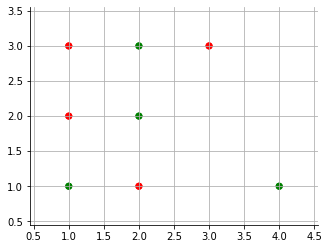

th [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]] th0 [[1.]]


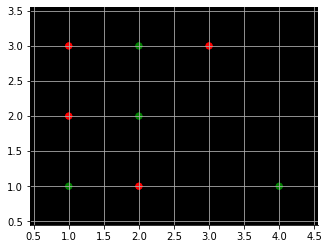

th [[  0.   0.  -1.   0.  -1.  -3.   0.  -1.  -3.  -7.   0.  -1.  -3.  -7.
  -15.   0.  -1.  -3.  -7. -15. -31.   0.  -1.  -3.  -7. -15. -31. -63.]] th0 [[0.]]


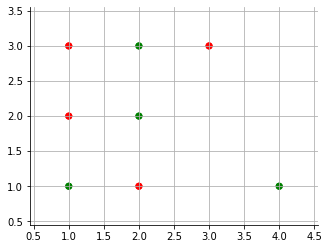

th [[  1.   2.   2.   4.   5.   6.   8.  11.  15.  20.  16.  23.  33.  47.
   66.  32.  47.  69. 101. 147. 212.  64.  95. 141. 209. 309. 455. 666.]] th0 [[1.]]


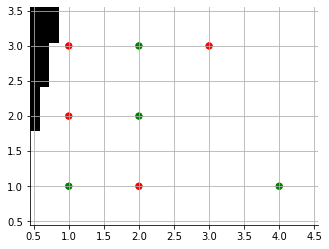

th [[  0.   1.  -1.   3.   2.  -3.   7.   8.   6.  -7.  15.  20.  24.  20.
  -15.  31.  44.  60.  74.  66. -31.  63.  92. 132. 182. 228. 212. -63.]] th0 [[0.]]


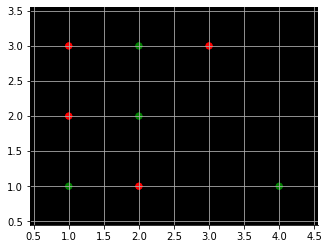

th [[  -1.   -2.   -4.   -6.   -7.  -12.  -20.  -19.  -21.  -34.  -66.  -61.
   -57.  -61.  -96. -212. -199. -183. -169. -177. -274. -666. -637. -597.
  -547. -501. -517. -792.]] th0 [[-1.]]


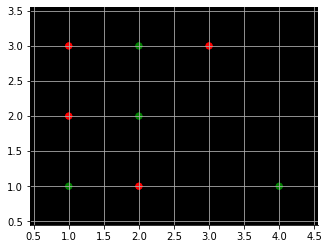

th [[   0.   -1.   -3.   -5.   -6.  -11.  -19.  -18.  -20.  -33.  -65.  -60.
   -56.  -60.  -95. -211. -198. -182. -168. -176. -273. -665. -636. -596.
  -546. -500. -516. -791.]] th0 [[0.]]


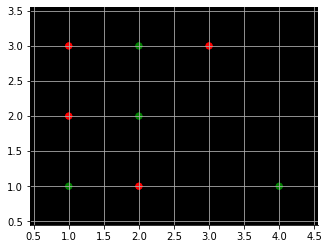

th [[   1.    1.   -1.   -1.   -2.   -7.  -11.  -10.  -12.  -25.  -49.  -44.
   -40.  -44.  -79. -179. -166. -150. -136. -144. -241. -601. -572. -532.
  -482. -436. -452. -727.]] th0 [[1.]]


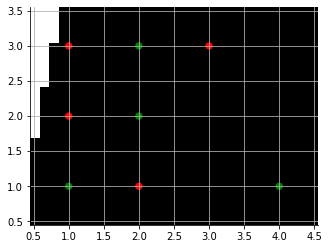

th [[   2.    3.    2.    3.    4.    2.   -3.    2.    6.    2.  -33.  -20.
    -4.   10.    2. -147. -118.  -78.  -28.   18.    2. -537. -476. -388.
  -266. -112.   34.    2.]] th0 [[2.]]


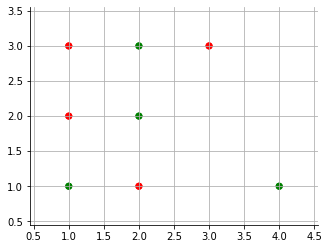

th [[ 3.000e+00  7.000e+00  3.000e+00  1.900e+01  8.000e+00  3.000e+00
   6.100e+01  1.800e+01  1.000e+01  3.000e+00  2.230e+02  4.400e+01
   1.200e+01  1.400e+01  3.000e+00  8.770e+02  1.380e+02 -1.400e+01
  -1.200e+01  2.200e+01  3.000e+00  3.559e+03  5.480e+02 -1.320e+02
  -2.020e+02 -9.600e+01  3.800e+01  3.000e+00]] th0 [[3.]]


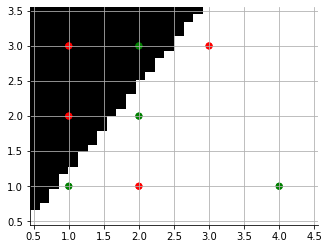

th [[ 2.000e+00  6.000e+00  0.000e+00  1.800e+01  5.000e+00 -6.000e+00
   6.000e+01  1.500e+01  1.000e+00 -2.400e+01  2.220e+02  4.100e+01
   3.000e+00 -1.300e+01 -7.800e+01  8.760e+02  1.350e+02 -2.300e+01
  -3.900e+01 -5.900e+01 -2.400e+02  3.558e+03  5.450e+02 -1.410e+02
  -2.290e+02 -1.770e+02 -2.050e+02 -7.260e+02]] th0 [[2.]]


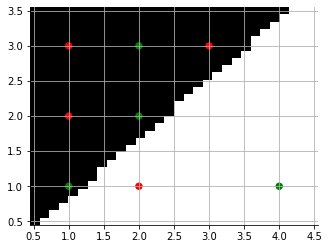

th [[ 1.000e+00  3.000e+00 -3.000e+00  9.000e+00 -4.000e+00 -1.500e+01
   3.300e+01 -1.200e+01 -2.600e+01 -5.100e+01  1.410e+02 -4.000e+01
  -7.800e+01 -9.400e+01 -1.590e+02  6.330e+02 -1.080e+02 -2.660e+02
  -2.820e+02 -3.020e+02 -4.830e+02  2.829e+03 -1.840e+02 -8.700e+02
  -9.580e+02 -9.060e+02 -9.340e+02 -1.455e+03]] th0 [[1.]]


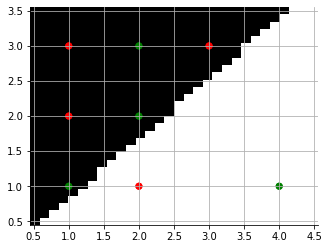

th [[ 2.000e+00  4.000e+00 -2.000e+00  1.000e+01 -3.000e+00 -1.400e+01
   3.400e+01 -1.100e+01 -2.500e+01 -5.000e+01  1.420e+02 -3.900e+01
  -7.700e+01 -9.300e+01 -1.580e+02  6.340e+02 -1.070e+02 -2.650e+02
  -2.810e+02 -3.010e+02 -4.820e+02  2.830e+03 -1.830e+02 -8.690e+02
  -9.570e+02 -9.050e+02 -9.330e+02 -1.454e+03]] th0 [[2.]]


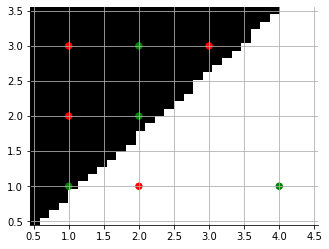

th [[ 3.000e+00  6.000e+00  0.000e+00  1.400e+01  1.000e+00 -1.000e+01
   4.200e+01 -3.000e+00 -1.700e+01 -4.200e+01  1.580e+02 -2.300e+01
  -6.100e+01 -7.700e+01 -1.420e+02  6.660e+02 -7.500e+01 -2.330e+02
  -2.490e+02 -2.690e+02 -4.500e+02  2.894e+03 -1.190e+02 -8.050e+02
  -8.930e+02 -8.410e+02 -8.690e+02 -1.390e+03]] th0 [[3.]]


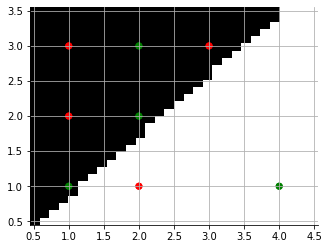

th [[ 2.000e+00  4.000e+00 -1.000e+00  1.000e+01 -1.000e+00 -1.100e+01
   3.400e+01 -7.000e+00 -1.900e+01 -4.300e+01  1.420e+02 -3.100e+01
  -6.500e+01 -7.900e+01 -1.430e+02  6.340e+02 -9.100e+01 -2.410e+02
  -2.530e+02 -2.710e+02 -4.510e+02  2.830e+03 -1.510e+02 -8.210e+02
  -9.010e+02 -8.450e+02 -8.710e+02 -1.391e+03]] th0 [[2.]]


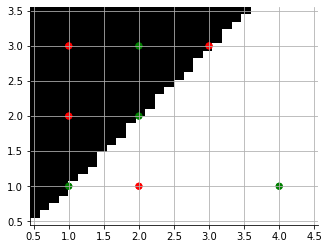

th [[ 3.000e+00  6.000e+00  2.000e+00  1.400e+01  5.000e+00 -2.000e+00
   4.200e+01  5.000e+00 -1.000e+00 -1.600e+01  1.580e+02 -7.000e+00
  -2.900e+01 -2.500e+01 -6.200e+01  6.660e+02 -4.300e+01 -1.690e+02
  -1.450e+02 -1.090e+02 -2.080e+02  2.894e+03 -5.500e+01 -6.770e+02
  -6.850e+02 -5.210e+02 -3.850e+02 -6.620e+02]] th0 [[3.]]


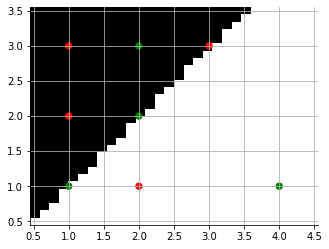

th [[ 4.000e+00  7.000e+00  3.000e+00  1.500e+01  6.000e+00 -1.000e+00
   4.300e+01  6.000e+00  0.000e+00 -1.500e+01  1.590e+02 -6.000e+00
  -2.800e+01 -2.400e+01 -6.100e+01  6.670e+02 -4.200e+01 -1.680e+02
  -1.440e+02 -1.080e+02 -2.070e+02  2.895e+03 -5.400e+01 -6.760e+02
  -6.840e+02 -5.200e+02 -3.840e+02 -6.610e+02]] th0 [[4.]]


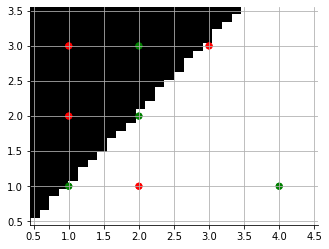

th [[   5.    9.    5.   19.   10.    3.   51.   14.    8.   -7.  175.   10.
   -12.   -8.  -45.  699.  -10. -136. -112.  -76. -175. 2959.   10. -612.
  -620. -456. -320. -597.]] th0 [[5.]]


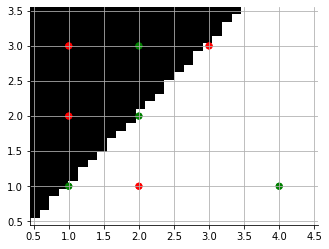

th [[ 4.000e+00  7.000e+00  4.000e+00  1.500e+01  8.000e+00  2.000e+00
   4.300e+01  1.000e+01  6.000e+00 -8.000e+00  1.590e+02  2.000e+00
  -1.600e+01 -1.000e+01 -4.600e+01  6.670e+02 -2.600e+01 -1.440e+02
  -1.160e+02 -7.800e+01 -1.760e+02  2.895e+03 -2.200e+01 -6.280e+02
  -6.280e+02 -4.600e+02 -3.220e+02 -5.980e+02]] th0 [[4.]]


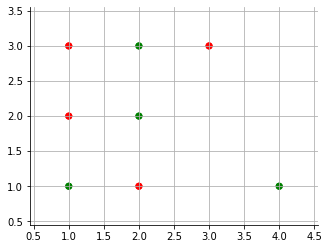

th [[   5.    9.    7.   19.   14.   11.   51.   22.   24.   19.  175.   26.
    20.   44.   35.  699.   22.  -72.   -8.   84.   67. 2959.   74. -484.
  -412. -136.  164.  131.]] th0 [[5.]]


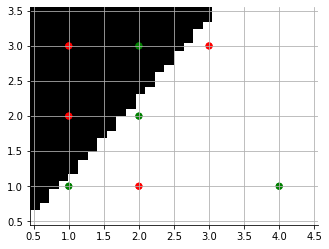

th [[ 4.000e+00  8.000e+00  4.000e+00  1.800e+01  1.100e+01  2.000e+00
   5.000e+01  1.900e+01  1.500e+01 -8.000e+00  1.740e+02  2.300e+01
   1.100e+01  1.700e+01 -4.600e+01  6.980e+02  1.900e+01 -8.100e+01
  -3.500e+01  3.000e+00 -1.760e+02  2.958e+03  7.100e+01 -4.930e+02
  -4.390e+02 -2.170e+02 -7.900e+01 -5.980e+02]] th0 [[4.]]


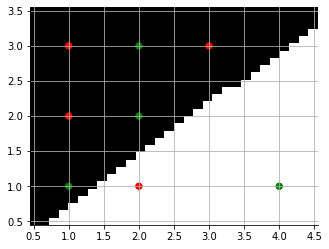

th [[ 3.000e+00  5.000e+00  1.000e+00  9.000e+00  2.000e+00 -7.000e+00
   2.300e+01 -8.000e+00 -1.200e+01 -3.500e+01  9.300e+01 -5.800e+01
  -7.000e+01 -6.400e+01 -1.270e+02  4.550e+02 -2.240e+02 -3.240e+02
  -2.780e+02 -2.400e+02 -4.190e+02  2.229e+03 -6.580e+02 -1.222e+03
  -1.168e+03 -9.460e+02 -8.080e+02 -1.327e+03]] th0 [[3.]]


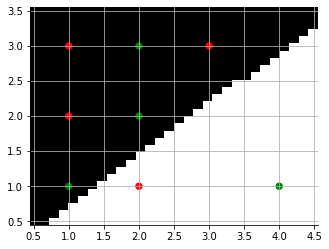

th [[ 4.000e+00  6.000e+00  2.000e+00  1.000e+01  3.000e+00 -6.000e+00
   2.400e+01 -7.000e+00 -1.100e+01 -3.400e+01  9.400e+01 -5.700e+01
  -6.900e+01 -6.300e+01 -1.260e+02  4.560e+02 -2.230e+02 -3.230e+02
  -2.770e+02 -2.390e+02 -4.180e+02  2.230e+03 -6.570e+02 -1.221e+03
  -1.167e+03 -9.450e+02 -8.070e+02 -1.326e+03]] th0 [[4.]]


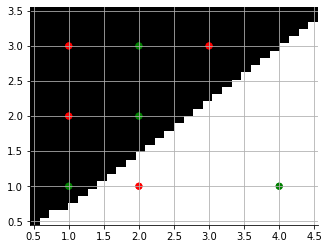

th [[ 5.000e+00  8.000e+00  4.000e+00  1.400e+01  7.000e+00 -2.000e+00
   3.200e+01  1.000e+00 -3.000e+00 -2.600e+01  1.100e+02 -4.100e+01
  -5.300e+01 -4.700e+01 -1.100e+02  4.880e+02 -1.910e+02 -2.910e+02
  -2.450e+02 -2.070e+02 -3.860e+02  2.294e+03 -5.930e+02 -1.157e+03
  -1.103e+03 -8.810e+02 -7.430e+02 -1.262e+03]] th0 [[5.]]


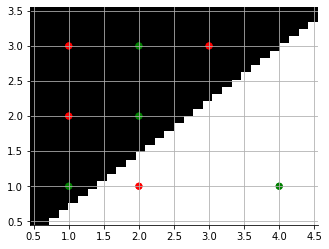

th [[    4.     6.     3.    10.     5.    -3.    24.    -3.    -5.   -27.
     94.   -49.   -57.   -49.  -111.   456.  -207.  -299.  -249.  -209.
   -387.  2230.  -625. -1173. -1111.  -885.  -745. -1263.]] th0 [[4.]]


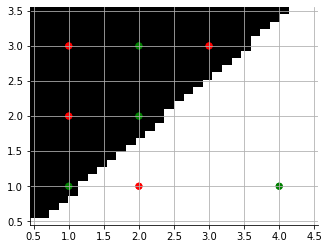

th [[    5.     8.     6.    14.    11.     6.    32.     9.    13.     0.
    110.   -25.   -21.     5.   -30.   488.  -159.  -227.  -141.   -47.
   -144.  2294.  -529. -1029.  -895.  -561.  -259.  -534.]] th0 [[5.]]


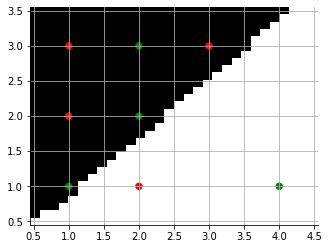

th [[ 6.000e+00  9.000e+00  7.000e+00  1.500e+01  1.200e+01  7.000e+00
   3.300e+01  1.000e+01  1.400e+01  1.000e+00  1.110e+02 -2.400e+01
  -2.000e+01  6.000e+00 -2.900e+01  4.890e+02 -1.580e+02 -2.260e+02
  -1.400e+02 -4.600e+01 -1.430e+02  2.295e+03 -5.280e+02 -1.028e+03
  -8.940e+02 -5.600e+02 -2.580e+02 -5.330e+02]] th0 [[6.]]


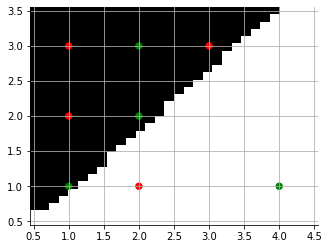

th [[   7.   11.    9.   19.   16.   11.   41.   18.   22.    9.  127.   -8.
    -4.   22.  -13.  521. -126. -194. -108.  -14. -111. 2359. -464. -964.
  -830. -496. -194. -469.]] th0 [[7.]]


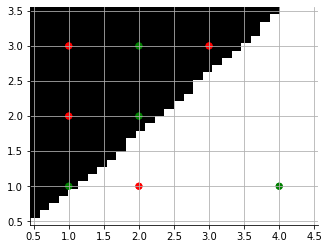

th [[   6.    9.    8.   15.   14.   10.   33.   14.   20.    8.  111.  -16.
    -8.   20.  -14.  489. -142. -202. -112.  -16. -112. 2295. -496. -980.
  -838. -500. -196. -470.]] th0 [[6.]]


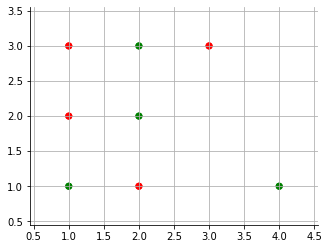

th [[   7.   11.   11.   19.   20.   19.   41.   26.   38.   35.  127.    8.
    28.   74.   67.  521.  -94. -130.   -4.  146.  131. 2359. -400. -836.
  -622. -176.  290.  259.]] th0 [[7.]]


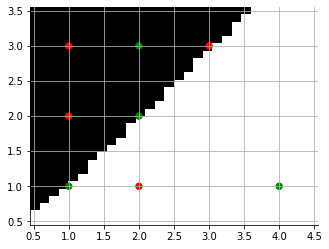

th [[   6.   10.    8.   18.   17.   10.   40.   23.   29.    8.  126.    5.
    19.   47.  -14.  520.  -97. -139.  -31.   65. -112. 2358. -403. -845.
  -649. -257.   47. -470.]] th0 [[6.]]


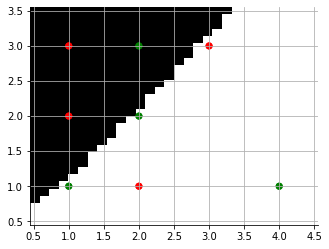

th [[ 7.000e+00  1.200e+01  1.000e+01  2.200e+01  2.100e+01  1.400e+01
   4.800e+01  3.100e+01  3.700e+01  1.600e+01  1.420e+02  2.100e+01
   3.500e+01  6.300e+01  2.000e+00  5.520e+02 -6.500e+01 -1.070e+02
   1.000e+00  9.700e+01 -8.000e+01  2.422e+03 -3.390e+02 -7.810e+02
  -5.850e+02 -1.930e+02  1.110e+02 -4.060e+02]] th0 [[7.]]


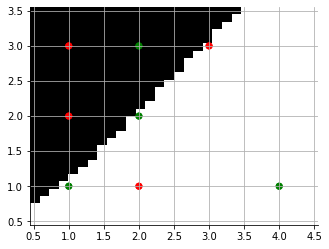

th [[ 6.000e+00  1.000e+01  9.000e+00  1.800e+01  1.900e+01  1.300e+01
   4.000e+01  2.700e+01  3.500e+01  1.500e+01  1.260e+02  1.300e+01
   3.100e+01  6.100e+01  1.000e+00  5.200e+02 -8.100e+01 -1.150e+02
  -3.000e+00  9.500e+01 -8.100e+01  2.358e+03 -3.710e+02 -7.970e+02
  -5.930e+02 -1.970e+02  1.090e+02 -4.070e+02]] th0 [[6.]]


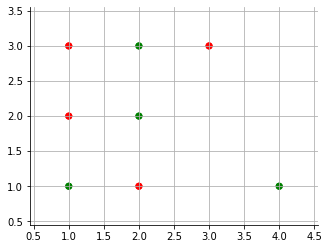

th [[   7.   12.   12.   22.   25.   22.   48.   39.   53.   42.  142.   37.
    67.  115.   82.  552.  -33.  -43.  105.  257.  162. 2422. -275. -653.
  -377.  127.  595.  322.]] th0 [[7.]]


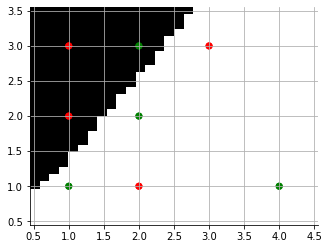

th [[ 6.000e+00  1.100e+01  9.000e+00  2.100e+01  2.200e+01  1.300e+01
   4.700e+01  3.600e+01  4.400e+01  1.500e+01  1.410e+02  3.400e+01
   5.800e+01  8.800e+01  1.000e+00  5.510e+02 -3.600e+01 -5.200e+01
   7.800e+01  1.760e+02 -8.100e+01  2.421e+03 -2.780e+02 -6.620e+02
  -4.040e+02  4.600e+01  3.520e+02 -4.070e+02]] th0 [[6.]]


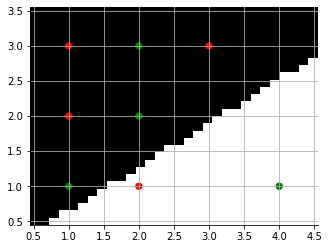

th [[    5.     8.     6.    12.    13.     4.    20.     9.    17.   -12.
     60.   -47.   -23.     7.   -80.   308.  -279.  -295.  -165.   -67.
   -324.  1692. -1007. -1391. -1133.  -683.  -377. -1136.]] th0 [[5.]]


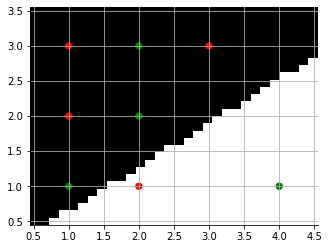

th [[    6.     9.     7.    13.    14.     5.    21.    10.    18.   -11.
     61.   -46.   -22.     8.   -79.   309.  -278.  -294.  -164.   -66.
   -323.  1693. -1006. -1390. -1132.  -682.  -376. -1135.]] th0 [[6.]]


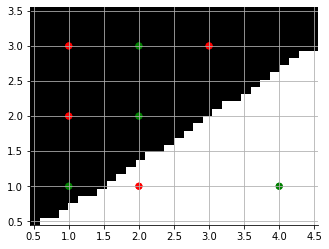

th [[    7.    11.     9.    17.    18.     9.    29.    18.    26.    -3.
     77.   -30.    -6.    24.   -63.   341.  -246.  -262.  -132.   -34.
   -291.  1757.  -942. -1326. -1068.  -618.  -312. -1071.]] th0 [[7.]]


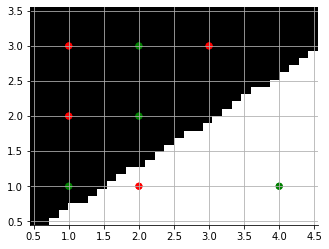

th [[    6.     9.     8.    13.    16.     8.    21.    14.    24.    -4.
     61.   -38.   -10.    22.   -64.   309.  -262.  -270.  -136.   -36.
   -292.  1693.  -974. -1342. -1076.  -622.  -314. -1072.]] th0 [[6.]]


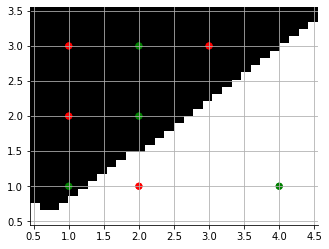

th [[    7.    11.    11.    17.    22.    17.    29.    26.    42.    23.
     77.   -14.    26.    76.    17.   341.  -214.  -198.   -28.   126.
    -49.  1757.  -878. -1198.  -860.  -298.   172.  -343.]] th0 [[7.]]


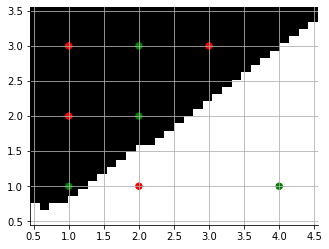

th [[    8.    12.    12.    18.    23.    18.    30.    27.    43.    24.
     78.   -13.    27.    77.    18.   342.  -213.  -197.   -27.   127.
    -48.  1758.  -877. -1197.  -859.  -297.   173.  -342.]] th0 [[8.]]


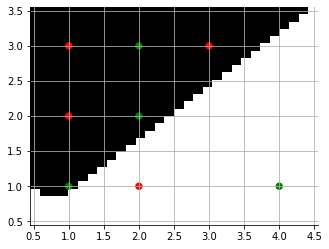

th [[    9.    14.    14.    22.    27.    22.    38.    35.    51.    32.
     94.     3.    43.    93.    34.   374.  -181.  -165.     5.   159.
    -16.  1822.  -813. -1133.  -795.  -233.   237.  -278.]] th0 [[9.]]


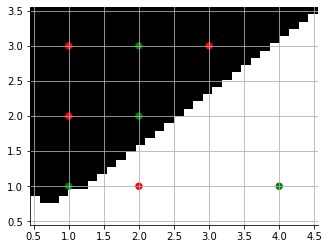

th [[ 8.000e+00  1.200e+01  1.300e+01  1.800e+01  2.500e+01  2.100e+01
   3.000e+01  3.100e+01  4.900e+01  3.100e+01  7.800e+01 -5.000e+00
   3.900e+01  9.100e+01  3.300e+01  3.420e+02 -1.970e+02 -1.730e+02
   1.000e+00  1.570e+02 -1.700e+01  1.758e+03 -8.450e+02 -1.149e+03
  -8.030e+02 -2.370e+02  2.350e+02 -2.790e+02]] th0 [[8.]]


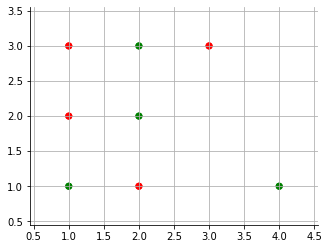

th [[    9.    14.    16.    22.    31.    30.    38.    43.    67.    58.
     94.    19.    75.   145.   114.   374.  -149.  -101.   109.   319.
    226.  1822.  -749. -1005.  -587.    87.   721.   450.]] th0 [[9.]]


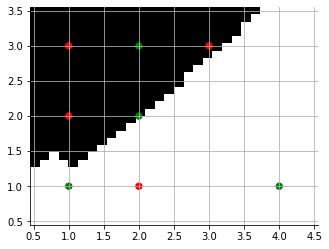

th [[    8.    13.    13.    21.    28.    21.    37.    40.    58.    31.
     93.    16.    66.   118.    33.   373.  -152.  -110.    82.   238.
    -17.  1821.  -752. -1014.  -614.     6.   478.  -279.]] th0 [[8.]]


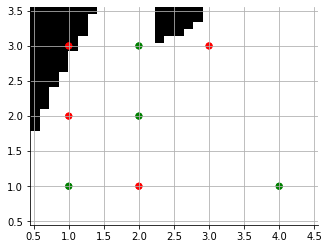

th [[   9.   15.   15.   25.   32.   25.   45.   48.   66.   39.  109.   32.
    82.  134.   49.  405. -120.  -78.  114.  270.   15. 1885. -688. -950.
  -550.   70.  542. -215.]] th0 [[9.]]


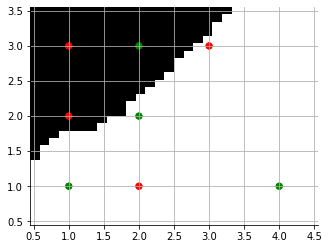

th [[   8.   14.   13.   24.   30.   21.   44.   46.   62.   31.  108.   30.
    78.  126.   33.  404. -122.  -82.  106.  254.  -17. 1884. -690. -954.
  -558.   54.  510. -279.]] th0 [[8.]]


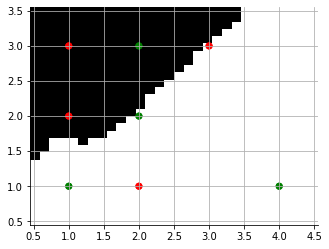

th [[   7.   12.   12.   20.   28.   20.   36.   42.   60.   30.   92.   22.
    74.  124.   32.  372. -138.  -90.  102.  252.  -18. 1820. -722. -970.
  -566.   50.  508. -280.]] th0 [[7.]]


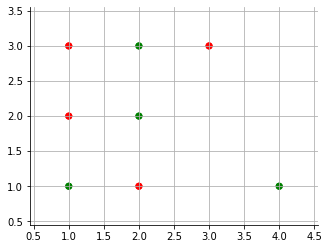

th [[   8.   14.   15.   24.   34.   29.   44.   54.   78.   57.  108.   46.
   110.  178.  113.  404.  -90.  -18.  210.  414.  225. 1884. -626. -826.
  -350.  374.  994.  449.]] th0 [[8.]]


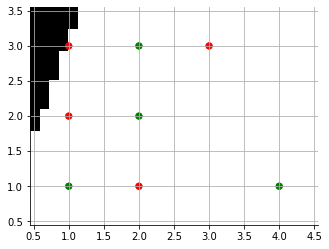

th [[   7.   13.   12.   23.   31.   20.   43.   51.   69.   30.  107.   43.
   101.  151.   32.  403.  -93.  -27.  183.  333.  -18. 1883. -629. -835.
  -377.  293.  751. -280.]] th0 [[7.]]


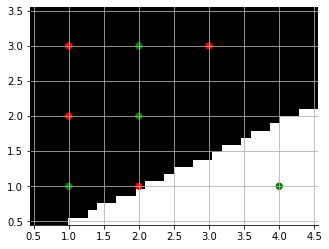

th [[    6.    10.     9.    14.    22.    11.    16.    24.    42.     3.
     26.   -38.    20.    70.   -49.   160.  -336.  -270.   -60.    90.
   -261.  1154. -1358. -1564. -1106.  -436.    22. -1009.]] th0 [[6.]]


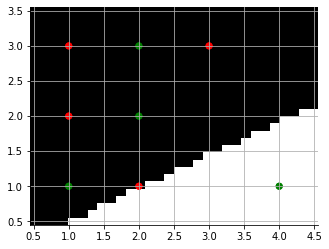

th [[    7.    11.    10.    15.    23.    12.    17.    25.    43.     4.
     27.   -37.    21.    71.   -48.   161.  -335.  -269.   -59.    91.
   -260.  1155. -1357. -1563. -1105.  -435.    23. -1008.]] th0 [[7.]]


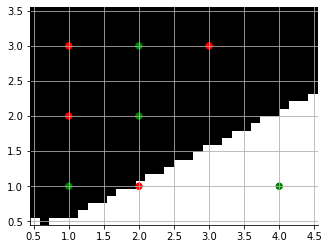

th [[    8.    13.    12.    19.    27.    16.    25.    33.    51.    12.
     43.   -21.    37.    87.   -32.   193.  -303.  -237.   -27.   123.
   -228.  1219. -1293. -1499. -1041.  -371.    87.  -944.]] th0 [[8.]]


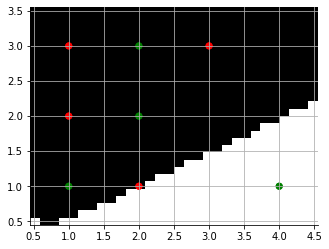

th [[    7.    11.    11.    15.    25.    15.    17.    29.    49.    11.
     27.   -29.    33.    85.   -33.   161.  -319.  -245.   -31.   121.
   -229.  1155. -1325. -1515. -1049.  -375.    85.  -945.]] th0 [[7.]]


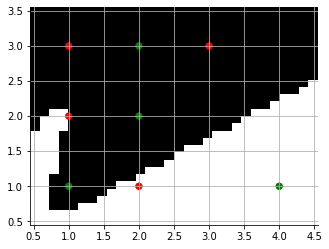

th [[    8.    13.    14.    19.    31.    24.    25.    41.    67.    38.
     43.    -5.    69.   139.    48.   193.  -271.  -173.    77.   283.
     14.  1219. -1229. -1371.  -833.   -51.   571.  -216.]] th0 [[8.]]


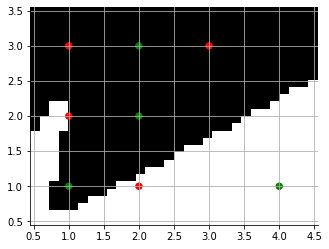

th [[    9.    14.    15.    20.    32.    25.    26.    42.    68.    39.
     44.    -4.    70.   140.    49.   194.  -270.  -172.    78.   284.
     15.  1220. -1228. -1370.  -832.   -50.   572.  -215.]] th0 [[9.]]


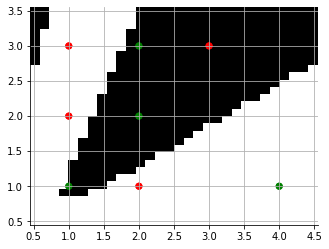

th [[   10.    16.    17.    24.    36.    29.    34.    50.    76.    47.
     60.    12.    86.   156.    65.   226.  -238.  -140.   110.   316.
     47.  1284. -1164. -1306.  -768.    14.   636.  -151.]] th0 [[10.]]


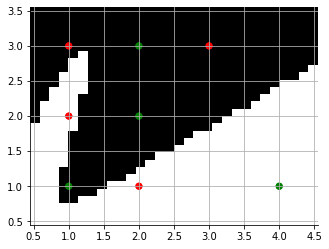

th [[    9.    15.    15.    23.    34.    25.    33.    48.    72.    39.
     59.    10.    82.   148.    49.   225.  -240.  -144.   102.   300.
     15.  1283. -1166. -1310.  -776.    -2.   604.  -215.]] th0 [[9.]]


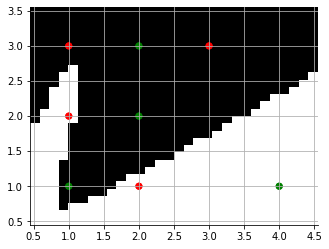

th [[    8.    13.    14.    19.    32.    24.    25.    44.    70.    38.
     43.     2.    78.   146.    48.   193.  -256.  -152.    98.   298.
     14.  1219. -1198. -1326.  -784.    -6.   602.  -216.]] th0 [[8.]]


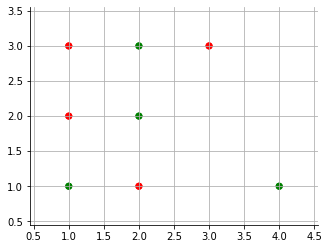

th [[    9.    15.    17.    23.    38.    33.    33.    56.    88.    65.
     59.    26.   114.   200.   129.   225.  -208.   -80.   206.   460.
    257.  1283. -1102. -1182.  -568.   318.  1088.   513.]] th0 [[9.]]


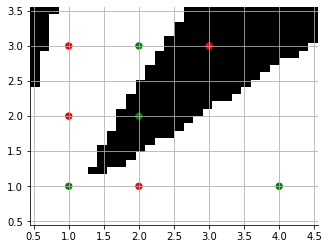

th [[    8.    14.    14.    22.    35.    24.    32.    53.    79.    38.
     58.    23.   105.   173.    48.   224.  -211.   -89.   179.   379.
     14.  1282. -1105. -1191.  -595.   237.   845.  -216.]] th0 [[8.]]


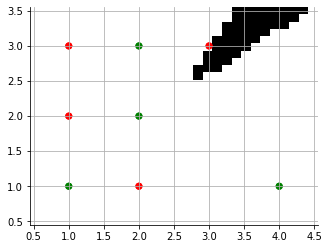

th [[    9.    16.    16.    26.    39.    28.    40.    61.    87.    46.
     74.    39.   121.   189.    64.   256.  -179.   -57.   211.   411.
     46.  1346. -1041. -1127.  -531.   301.   909.  -152.]] th0 [[9.]]


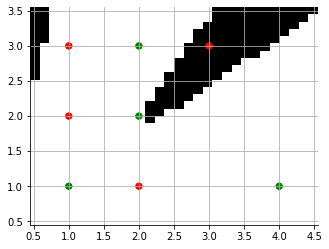

th [[    8.    15.    14.    25.    37.    24.    39.    59.    83.    38.
     73.    37.   117.   181.    48.   255.  -181.   -61.   203.   395.
     14.  1345. -1043. -1131.  -539.   285.   877.  -216.]] th0 [[8.]]


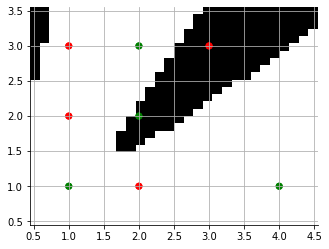

th [[    7.    13.    13.    21.    35.    23.    31.    55.    81.    37.
     57.    29.   113.   179.    47.   223.  -197.   -69.   199.   393.
     13.  1281. -1075. -1147.  -547.   281.   875.  -217.]] th0 [[7.]]


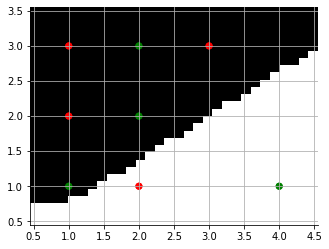

th [[    6.    12.    10.    20.    32.    14.    30.    52.    72.    10.
     56.    26.   104.   152.   -34.   222.  -200.   -78.   172.   312.
   -230.  1280. -1078. -1156.  -574.   200.   632.  -946.]] th0 [[6.]]


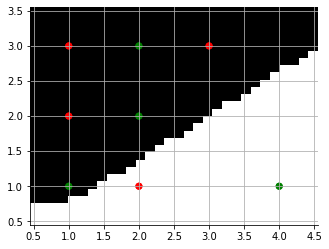

th [[    7.    13.    11.    21.    33.    15.    31.    53.    73.    11.
     57.    27.   105.   153.   -33.   223.  -199.   -77.   173.   313.
   -229.  1281. -1077. -1155.  -573.   201.   633.  -945.]] th0 [[7.]]


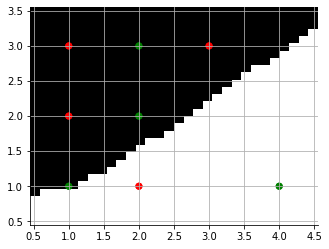

th [[    8.    15.    13.    25.    37.    19.    39.    61.    81.    19.
     73.    43.   121.   169.   -17.   255.  -167.   -45.   205.   345.
   -197.  1345. -1013. -1091.  -509.   265.   697.  -881.]] th0 [[8.]]


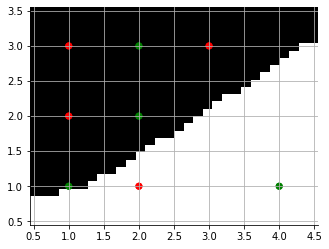

th [[    7.    13.    12.    21.    35.    18.    31.    57.    79.    18.
     57.    35.   117.   167.   -18.   223.  -183.   -53.   201.   343.
   -198.  1281. -1045. -1107.  -517.   261.   695.  -882.]] th0 [[7.]]


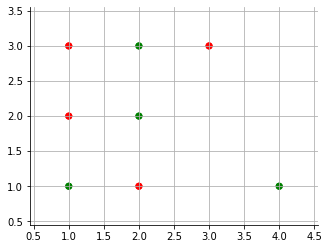

th [[   8.   15.   15.   25.   41.   27.   39.   69.   97.   45.   73.   59.
   153.  221.   63.  255. -135.   19.  309.  505.   45. 1345. -949. -963.
  -301.  585. 1181. -153.]] th0 [[8.]]


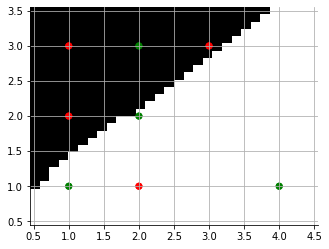

th [[   7.   14.   12.   24.   38.   18.   38.   66.   88.   18.   72.   56.
   144.  194.  -18.  254. -138.   10.  282.  424. -198. 1344. -952. -972.
  -328.  504.  938. -882.]] th0 [[7.]]


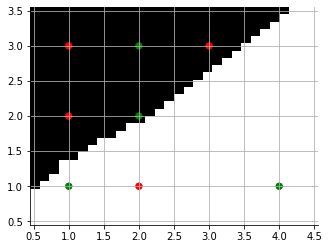

th [[   6.   12.   11.   20.   36.   17.   30.   62.   86.   17.   56.   48.
   140.  192.  -19.  222. -154.    2.  278.  422. -199. 1280. -984. -988.
  -336.  500.  936. -883.]] th0 [[6.]]


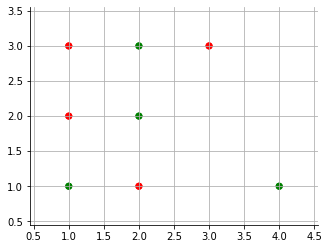

th [[   7.   14.   14.   24.   42.   26.   38.   74.  104.   44.   72.   72.
   176.  246.   62.  254. -106.   74.  386.  584.   44. 1344. -888. -844.
  -120.  824. 1422. -154.]] th0 [[7.]]


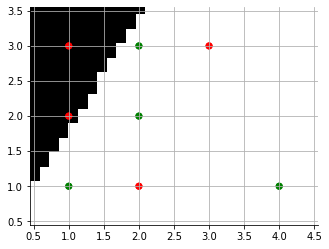

th [[   6.   13.   11.   23.   39.   17.   37.   71.   95.   17.   71.   69.
   167.  219.  -19.  253. -109.   65.  359.  503. -199. 1343. -891. -853.
  -147.  743. 1179. -883.]] th0 [[6.]]


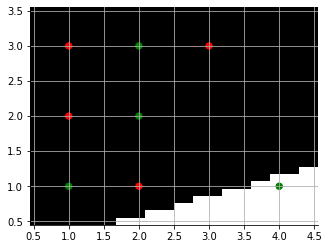

th [[    5.    10.     8.    14.    30.     8.    10.    44.    68.   -10.
    -10.   -12.    86.   138.  -100.    10.  -352.  -178.   116.   260.
   -442.   614. -1620. -1582.  -876.    14.   450. -1612.]] th0 [[5.]]


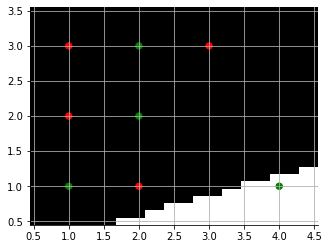

th [[    6.    11.     9.    15.    31.     9.    11.    45.    69.    -9.
     -9.   -11.    87.   139.   -99.    11.  -351.  -177.   117.   261.
   -441.   615. -1619. -1581.  -875.    15.   451. -1611.]] th0 [[6.]]


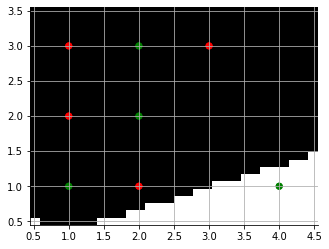

th [[ 7.000e+00  1.300e+01  1.100e+01  1.900e+01  3.500e+01  1.300e+01
   1.900e+01  5.300e+01  7.700e+01 -1.000e+00  7.000e+00  5.000e+00
   1.030e+02  1.550e+02 -8.300e+01  4.300e+01 -3.190e+02 -1.450e+02
   1.490e+02  2.930e+02 -4.090e+02  6.790e+02 -1.555e+03 -1.517e+03
  -8.110e+02  7.900e+01  5.150e+02 -1.547e+03]] th0 [[7.]]


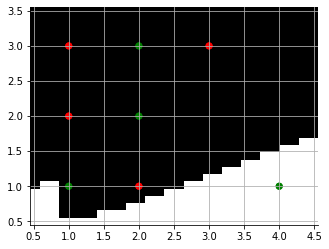

th [[    8.    15.    14.    23.    41.    22.    27.    65.    95.    26.
     23.    29.   139.   209.    -2.    75.  -271.   -73.   257.   455.
   -166.   743. -1459. -1373.  -595.   403.  1001.  -818.]] th0 [[8.]]


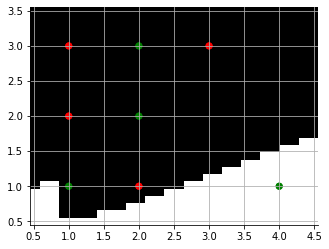

th [[ 9.000e+00  1.600e+01  1.500e+01  2.400e+01  4.200e+01  2.300e+01
   2.800e+01  6.600e+01  9.600e+01  2.700e+01  2.400e+01  3.000e+01
   1.400e+02  2.100e+02 -1.000e+00  7.600e+01 -2.700e+02 -7.200e+01
   2.580e+02  4.560e+02 -1.650e+02  7.440e+02 -1.458e+03 -1.372e+03
  -5.940e+02  4.040e+02  1.002e+03 -8.170e+02]] th0 [[9.]]


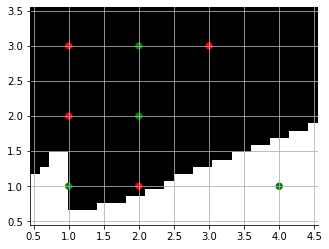

th [[   10.    18.    17.    28.    46.    27.    36.    74.   104.    35.
     40.    46.   156.   226.    15.   108.  -238.   -40.   290.   488.
   -133.   808. -1394. -1308.  -530.   468.  1066.  -753.]] th0 [[10.]]


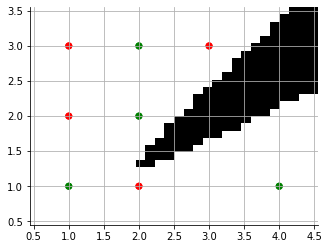

th [[   11.    20.    20.    32.    52.    36.    44.    86.   122.    62.
     56.    70.   192.   280.    96.   140.  -190.    32.   398.   650.
    110.   872. -1298. -1164.  -314.   792.  1552.   -24.]] th0 [[11.]]


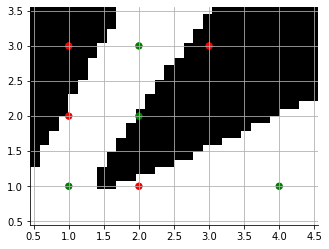

th [[   10.    19.    17.    31.    49.    27.    43.    83.   113.    35.
     55.    67.   183.   253.    15.   139.  -193.    23.   371.   569.
   -133.   871. -1301. -1173.  -341.   711.  1309.  -753.]] th0 [[10.]]


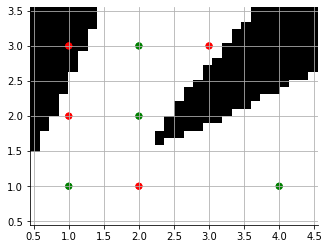

th [[   11.    21.    19.    35.    53.    31.    51.    91.   121.    43.
     71.    83.   199.   269.    31.   171.  -161.    55.   403.   601.
   -101.   935. -1237. -1109.  -277.   775.  1373.  -689.]] th0 [[11.]]


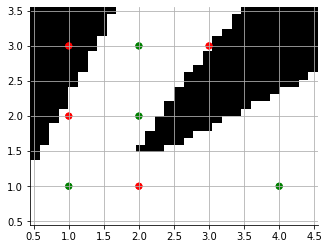

th [[   10.    20.    17.    34.    51.    27.    50.    89.   117.    35.
     70.    81.   195.   261.    15.   170.  -163.    51.   395.   585.
   -133.   934. -1239. -1113.  -285.   759.  1341.  -753.]] th0 [[10.]]


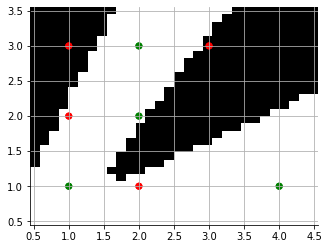

th [[    9.    18.    16.    30.    49.    26.    42.    85.   115.    34.
     54.    73.   191.   259.    14.   138.  -179.    43.   391.   583.
   -134.   870. -1271. -1129.  -293.   755.  1339.  -754.]] th0 [[9.]]


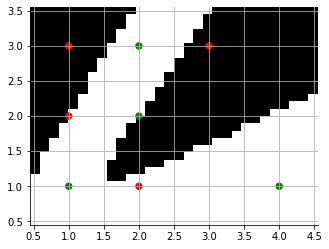

th [[    8.    17.    14.    29.    47.    22.    41.    83.   111.    26.
     53.    71.   187.   251.    -2.   137.  -181.    39.   383.   567.
   -166.   869. -1273. -1133.  -301.   739.  1307.  -818.]] th0 [[8.]]


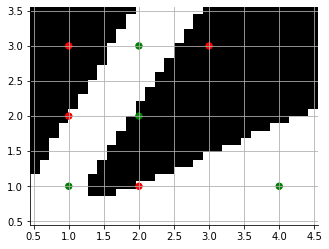

th [[    7.    15.    13.    25.    45.    21.    33.    79.   109.    25.
     37.    63.   183.   249.    -3.   105.  -197.    31.   379.   565.
   -167.   805. -1305. -1149.  -309.   735.  1305.  -819.]] th0 [[7.]]


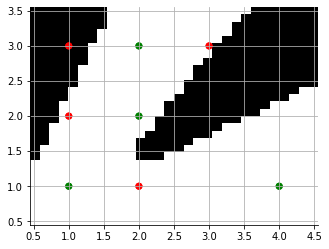

th [[    8.    17.    15.    29.    49.    25.    41.    87.   117.    33.
     53.    79.   199.   265.    13.   137.  -165.    63.   411.   597.
   -135.   869. -1241. -1085.  -245.   799.  1369.  -755.]] th0 [[8.]]


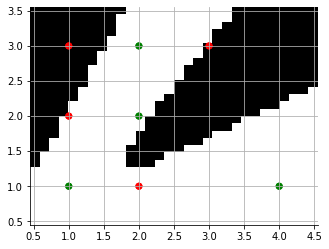

th [[    7.    16.    13.    28.    47.    21.    40.    85.   113.    25.
     52.    77.   195.   257.    -3.   136.  -167.    59.   403.   581.
   -167.   868. -1243. -1089.  -253.   783.  1337.  -819.]] th0 [[7.]]


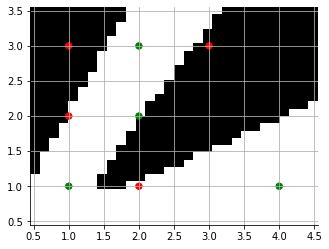

th [[    6.    14.    12.    24.    45.    20.    32.    81.   111.    24.
     36.    69.   191.   255.    -4.   104.  -183.    51.   399.   579.
   -168.   804. -1275. -1105.  -261.   779.  1335.  -820.]] th0 [[6.]]


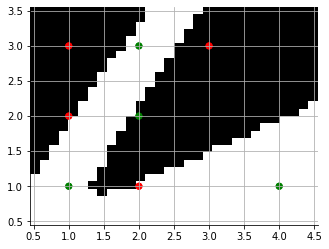

th [[    5.    13.    10.    23.    43.    16.    31.    79.   107.    16.
     35.    67.   187.   247.   -20.   103.  -185.    47.   391.   563.
   -200.   803. -1277. -1109.  -269.   763.  1303.  -884.]] th0 [[5.]]


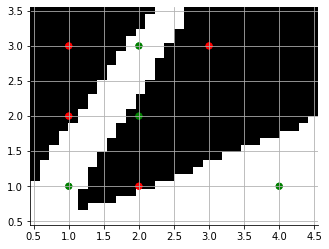

th [[    4.    11.     9.    19.    41.    15.    23.    75.   105.    15.
     19.    59.   183.   245.   -21.    71.  -201.    39.   387.   561.
   -201.   739. -1309. -1125.  -277.   759.  1301.  -885.]] th0 [[4.]]


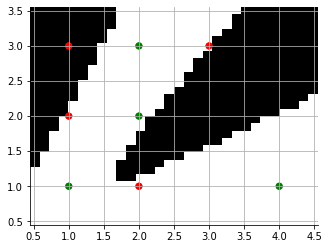

th [[    5.    13.    11.    23.    45.    19.    31.    83.   113.    23.
     35.    75.   199.   261.    -5.   103.  -169.    71.   419.   593.
   -169.   803. -1245. -1061.  -213.   823.  1365.  -821.]] th0 [[5.]]


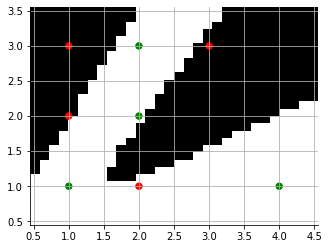

th [[    4.    12.     9.    22.    43.    15.    30.    81.   109.    15.
     34.    73.   195.   253.   -21.   102.  -171.    67.   411.   577.
   -201.   802. -1247. -1065.  -221.   807.  1333.  -885.]] th0 [[4.]]


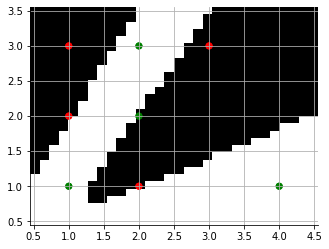

th [[    3.    10.     8.    18.    41.    14.    22.    77.   107.    14.
     18.    65.   191.   251.   -22.    70.  -187.    59.   407.   575.
   -202.   738. -1279. -1081.  -229.   803.  1331.  -886.]] th0 [[3.]]


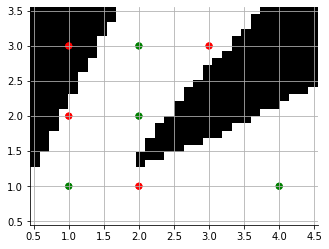

th [[    4.    12.    10.    22.    45.    18.    30.    85.   115.    22.
     34.    81.   207.   267.    -6.   102.  -155.    91.   439.   607.
   -170.   802. -1215. -1017.  -165.   867.  1395.  -822.]] th0 [[4.]]


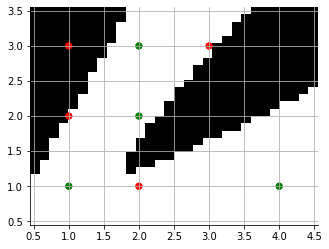

th [[    3.    11.     8.    21.    43.    14.    29.    83.   111.    14.
     33.    79.   203.   259.   -22.   101.  -157.    87.   431.   591.
   -202.   801. -1217. -1021.  -173.   851.  1363.  -886.]] th0 [[3.]]


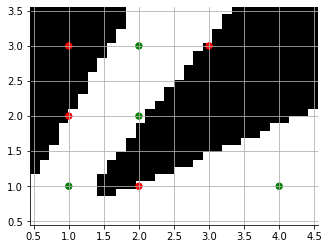

th [[    2.     9.     7.    17.    41.    13.    21.    79.   109.    13.
     17.    71.   199.   257.   -23.    69.  -173.    79.   427.   589.
   -203.   737. -1249. -1037.  -181.   847.  1361.  -887.]] th0 [[2.]]


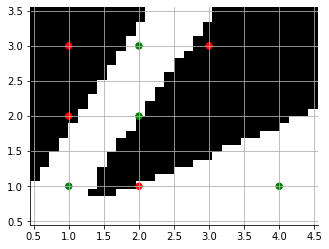

th [[ 1.000e+00  8.000e+00  5.000e+00  1.600e+01  3.900e+01  9.000e+00
   2.000e+01  7.700e+01  1.050e+02  5.000e+00  1.600e+01  6.900e+01
   1.950e+02  2.490e+02 -3.900e+01  6.800e+01 -1.750e+02  7.500e+01
   4.190e+02  5.730e+02 -2.350e+02  7.360e+02 -1.251e+03 -1.041e+03
  -1.890e+02  8.310e+02  1.329e+03 -9.510e+02]] th0 [[1.]]


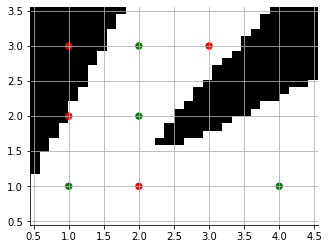

th [[    2.    10.     7.    20.    43.    13.    28.    85.   113.    13.
     32.    85.   211.   265.   -23.   100.  -143.   107.   451.   605.
   -203.   800. -1187.  -977.  -125.   895.  1393.  -887.]] th0 [[2.]]


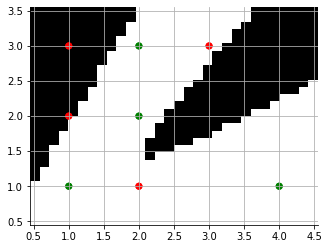

th [[ 1.000e+00  9.000e+00  5.000e+00  1.900e+01  4.100e+01  9.000e+00
   2.700e+01  8.300e+01  1.090e+02  5.000e+00  3.100e+01  8.300e+01
   2.070e+02  2.570e+02 -3.900e+01  9.900e+01 -1.450e+02  1.030e+02
   4.430e+02  5.890e+02 -2.350e+02  7.990e+02 -1.189e+03 -9.810e+02
  -1.330e+02  8.790e+02  1.361e+03 -9.510e+02]] th0 [[1.]]


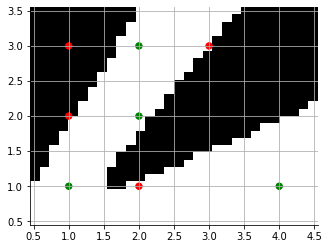

th [[    0.     7.     4.    15.    39.     8.    19.    79.   107.     4.
     15.    75.   203.   255.   -40.    67.  -161.    95.   439.   587.
   -236.   735. -1221.  -997.  -141.   875.  1359.  -952.]] th0 [[0.]]


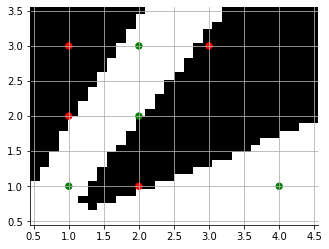

th [[-1.000e+00  5.000e+00  3.000e+00  1.100e+01  3.700e+01  7.000e+00
   1.100e+01  7.500e+01  1.050e+02  3.000e+00 -1.000e+00  6.700e+01
   1.990e+02  2.530e+02 -4.100e+01  3.500e+01 -1.770e+02  8.700e+01
   4.350e+02  5.850e+02 -2.370e+02  6.710e+02 -1.253e+03 -1.013e+03
  -1.490e+02  8.710e+02  1.357e+03 -9.530e+02]] th0 [[-1.]]
101


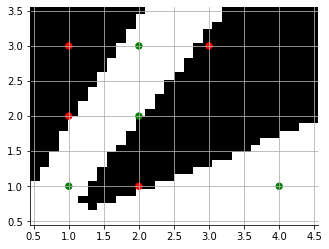

th [[-1.000e+00  5.000e+00  3.000e+00  1.100e+01  3.700e+01  7.000e+00
   1.100e+01  7.500e+01  1.050e+02  3.000e+00 -1.000e+00  6.700e+01
   1.990e+02  2.530e+02 -4.100e+01  3.500e+01 -1.770e+02  8.700e+01
   4.350e+02  5.850e+02 -2.370e+02  6.710e+02 -1.253e+03 -1.013e+03
  -1.490e+02  8.710e+02  1.357e+03 -9.530e+02]] th0 [[-1.]]
Final score 1.0
Params [[-1.000e+00  5.000e+00  3.000e+00  1.100e+01  3.700e+01  7.000e+00
   1.100e+01  7.500e+01  1.050e+02  3.000e+00 -1.000e+00  6.700e+01
   1.990e+02  2.530e+02 -4.100e+01  3.500e+01 -1.770e+02  8.700e+01
   4.350e+02  5.850e+02 -2.370e+02  6.710e+02 -1.253e+03 -1.013e+03
  -1.490e+02  8.710e+02  1.357e+03 -9.530e+02]] [[-1.]]


In [103]:
print(xor_more())
test_with_features(xor_more, order=6, draw=True, pause=False)

# Experiments

## 4) Car Data - Evaluating Algorithmic and Feature Choices

We now want to build a classifier for the auto data, focusing on the
numeric data.  In the code file for this part of the assignment, we have supplied you
with the `load_auto_data` function, that can be used to read the
relevant .tsv file.  It will return a list of dictionaries, one for each data item.

We then have to specify what feature function to use for each column
in the data.  The file `hw3_part2_main.py` has an example for constructing
the data and label arrays using `raw` feature function for all the columns.
Look at the definition of `features` in `hw3_part2_main.py`, this indicates a feature name to
use and then a feature function, there are three defined in the
`code_for_hw3_part2.py` file (`raw`, `standard` and `one_hot`).  `raw` just uses
the original value, `standard` subtracts out the mean value and
divides by the standard deviation and `one_hot` does the encoding
described in the notes.

The function `auto_data_and_labels` will process the dictionaries and
return <tt>data, labels</tt> where <tt>data</tt> are arrays of
dimension $(d, 392)$, with $d$ the total number of features specified,
and <tt>labels</tt> is of dimension $(1, 392)$.  The data in the file
is sorted by class, but it will be shuffled when you read it in.

In [118]:
# Returns a list of dictionaries.  Keys are the column names, including mpg.
auto_data_all = hw3.load_auto_data('auto-mpg.tsv')

# The choice of feature processing for each feature, mpg is always raw and
# does not need to be specified.  Other choices are hw3.standard and hw3.one_hot.
# 'name' is not numeric and would need a different encoding.
raw_features = [('cylinders', hw3.raw),
            ('displacement', hw3.raw),
            ('horsepower', hw3.raw),
            ('weight', hw3.raw),
            ('acceleration', hw3.raw),
            ## Drop model_year by default
            ## ('model_year', hw3.raw),
            ('origin', hw3.raw)]

smart_features = [('cylinders', hw3.one_hot),
            ('displacement', hw3.standard),
            ('horsepower', hw3.standard),
            ('weight', hw3.standard),
            ('acceleration', hw3.standard),
            ## Drop model_year by default
            ## ('model_year', hw3.raw),
            ('origin', hw3.one_hot)]

# Construct the standard data and label arrays
auto_data, auto_labels = hw3.auto_data_and_labels(auto_data_all, features)
print('auto data and labels shape', auto_data.shape, auto_labels.shape)

smart_auto_data, smart_auto_labels = hw3.auto_data_and_labels(auto_data_all, smart_features)
print('auto data and labels shape', smart_auto_data.shape, smart_auto_labels.shape)

avg and std {}
entries in one_hot field {}
auto data and labels shape (6, 392) (1, 392)
avg and std {'displacement': (388.3482142857143, 302.0458123396403), 'horsepower': (509.3545918367347, 333.6521151716361), 'weight': (2977.5841836734694, 848.3184465698365), 'acceleration': (15.541326530612228, 2.7553429127509963)}
entries in one_hot field {'cylinders': [3.0, 4.0, 5.0, 6.0, 8.0], 'origin': [1.0, 2.0, 3.0]}
auto data and labels shape (12, 392) (1, 392)


T: 1 Stupid

In [119]:
# Your code here to process the auto data
xval_learning_alg(lambda auto_data, auto_labels: perceptron(auto_data, auto_labels, {"T": 1}), auto_data, auto_labels, k=10)

97
97
95
90
98
94
99
97
92
94


0.6526282051282052

In [120]:
# Your code here to process the auto data
xval_learning_alg(lambda auto_data, auto_labels: averaged_perceptron(auto_data, auto_labels, {"T": 1}), auto_data, auto_labels, k=10)

0.8441025641025641

T: 1  SMart


In [121]:
# Your code here to process the auto data
xval_learning_alg(lambda smart_auto_data, smart_auto_labels: perceptron(smart_auto_data, smart_auto_labels, {"T": 1}), smart_auto_data, smart_auto_labels, k=10)

57
58
59
58
60
59
60
56
56
57


0.7908333333333333

In [122]:
# Your code here to process the auto data
xval_learning_alg(lambda smart_auto_data, smart_auto_labels: averaged_perceptron(smart_auto_data, smart_auto_labels, {"T": 1}), smart_auto_data, smart_auto_labels, k=10)

0.9004487179487182

T: 10 Stupid



In [123]:
# Your code here to process the auto data
xval_learning_alg(lambda auto_data, auto_labels: perceptron(auto_data, auto_labels, {"T": 10}), auto_data, auto_labels, k=10)

810
815
799
811
831
801
834
809
753
789


0.7423076923076924

In [124]:
# Your code here to process the auto data
xval_learning_alg(lambda auto_data, auto_labels: averaged_perceptron(auto_data, auto_labels, {"T": 10}), auto_data, auto_labels, k=10)

0.8366025641025641

T: 10 Smart


In [125]:
# Your code here to process the auto data
xval_learning_alg(lambda smart_auto_data, smart_auto_labels: perceptron(smart_auto_data, smart_auto_labels, {"T": 10}), smart_auto_data, smart_auto_labels, k=10)

545
540
563
529
546
540
531
495
532
547


0.8061538461538461

In [126]:
# Your code here to process the auto data
xval_learning_alg(lambda smart_auto_data, smart_auto_labels: averaged_perceptron(smart_auto_data, smart_auto_labels, {"T": 10}), smart_auto_data, smart_auto_labels, k=10)

0.8979487179487181

T: 50 Stupid

In [127]:
# Your code here to process the auto data
xval_learning_alg(lambda auto_data, auto_labels: perceptron(auto_data, auto_labels, {"T": 50}), auto_data, auto_labels, k=10)

4000
4020
3892
4075
4048
3955
4065
3962
3666
3850


0.6909615384615384

In [128]:
# Your code here to process the auto data
xval_learning_alg(lambda auto_data, auto_labels: averaged_perceptron(auto_data, auto_labels, {"T": 50}), auto_data, auto_labels, k=10)

0.8366025641025641

T: 50 Smart

In [129]:
# Your code here to process the auto data
xval_learning_alg(lambda smart_auto_data, smart_auto_labels: perceptron(smart_auto_data, smart_auto_labels, {"T": 50}), smart_auto_data, smart_auto_labels, k=10)

2665
2623
2745
2623
2649
2644
2588
2430
2657
2696


0.8060256410256409

In [130]:
# Your code here to process the auto data
xval_learning_alg(lambda smart_auto_data, smart_auto_labels: averaged_perceptron(smart_auto_data, smart_auto_labels, {"T": 50}), smart_auto_data, smart_auto_labels, k=10)

0.9005128205128207

In [132]:
averaged_perceptron(smart_auto_data, smart_auto_labels, {"T": 10})

(array([[-0.92168367],
        [ 1.50280612],
        [ 0.40229592],
        [-0.7630102 ],
        [ 0.73903061],
        [-1.17833746],
        [ 0.45228459],
        [-4.91225636],
        [ 0.45783691],
        [ 0.27806122],
        [ 0.97091837],
        [-0.28954082]]), array([[0.95943878]]))

## 5) Food Reviews - Evaluating Algorithmic and Feature Choices

We have supplied you with the `load_review_data`
function, that can be used to read a .tsv file and return the labels
and texts. We have also supplied you with the `bag_of_words` function,
which takes the raw data and returns a dictionary of unigram
words. The resulting dictionary is an input to
`extract_bow_feature_vectors` which computes a feature matrix of ones
and zeros that can be used as the input for the classification
algorithms.  The file `hw3_part2_main.py` has code for constructing
the data and label arrays.  Using these arrays and our implementation
of the learning algorithms, you will be able to compute $\theta$ and
$\theta_0$.  You will need to add the
implementation of Perceptron and Averaged Perceptron.

In [133]:
# Returns lists of dictionaries.  Keys are the column names, 'sentiment' and 'text'.
# The train data has 10,000 examples
review_data = hw3.load_review_data('reviews.tsv')

# Lists texts of reviews and list of labels (1 or -1)
review_texts, review_label_list = zip(*((sample['text'], sample['sentiment']) for sample in review_data))

# The dictionary of all the words for "bag of words", mapping unique words to unique integer values
dictionary = hw3.bag_of_words(review_texts)

# The standard data arrays for the bag of words
review_bow_data = hw3.extract_bow_feature_vectors(review_texts, dictionary)
review_labels = hw3.rv(review_label_list)
print('review_bow_data and labels shape', review_bow_data.shape, review_labels.shape)

review_bow_data and labels shape (19945, 10000) (1, 10000)


In [139]:
# Your code here to process the food review data
print("Perceptron")
for T in [1, 10, 50]:
  print('T: ', T)
  xval_learning_alg(lambda review_bow_data, review_labels: perceptron(review_bow_data, review_labels, {"T": T}), review_bow_data, review_labels, k=10)

print("Avg perceptron")
for T in [1, 10, 50]:
  print('T: ', T)
  xval_learning_alg(lambda review_bow_data, review_labels: perceptron(review_bow_data, review_labels, {"T": T}), review_bow_data, review_labels, k=10)

1
2436
2436
2472
2472
2479
2473
2499
2500
2495
2495
10
12238
11918
12283
11998
12123
11957
12230
12171
12071
12176
50


KeyboardInterrupt: ignored

In [142]:
xval_learning_alg(lambda review_bow_data, review_labels: averaged_perceptron(review_bow_data, review_labels, {"T": 10}), review_bow_data, review_labels, k=10)

0.8237

In [145]:
th, th0 = averaged_perceptron(review_bow_data, review_labels, {"T": 10})
print("th: ", th)
print("th0: ", th0)

[[ 0.15984]
 [-2.74048]
 [-1.23668]
 ...
 [ 0.     ]
 [-1.2001 ]
 [ 0.     ]]
th0:  [[-1.72795]]


In [162]:
reversed_dict = hw3.reverse_dict(dictionary)

print([reversed_dict[np.argsort(th, axis=0)[-i -1, 0]] for i in range(10)])
print([reversed_dict[np.argsort(th, axis=0)[i, 0]] for i in range(10)])

['excellent', 'delicious', 'satisfied', 'easily', 'perfect', 'skeptical', 'yummy', 'bright', 'individually', 'great']
['worst', 'awful', 'unfortunately', 'horrible', 'stuck', 'changed', 'disappointment', 'bland', 'poor', 'formula']


## 6.2) Evaluating Features for MNIST Data


This problem explores how well the perceptron algorithm works to <a
href="http://neuralnetworksanddeeplearning.com/chap1.html">classify
images of handwritten digits</a>, from the well-known ("MNIST")
dataset, buiding on your thoughts from lab about extracting features
from images.  This exercise will highlight how important feature
extraction is, before linear classification is done, using algorithms
such as the Perceptron.

<b>Dataset setup</b>

Often, it may be easier to work with a vector whose spatial orientation is preserved.
In previous parts, we have represented features as one long feature vector.
For images, however, we often represent a $m$ by $n$ image
as a `(m,n)` array, rather than a `(mn,1)` array
(as the previous parts have done).

In the code file, we have supplied you with the `load_mnist_data` function,
which will read from the provided image files and populate a dictionary,
with image and label vectors for each numerical digit from 0 to 9.
These images are already shaped as `(m,n)` arrays.

In [188]:
mnist_data_all = hw3.load_mnist_data(range(10))

print('mnist_data_all loaded. shape of single images is', mnist_data_all[0]["images"][0].shape)

# HINT: change the [0] and [1] if you want to access different images
data = []
labels = []
comparisons = [(0,1), (2, 4), (6, 8), (9, 0)]
for i,j in comparisons:
  print("Dataset with: ", i, j)
  d0 = mnist_data_all[i]["images"]
  d1 = mnist_data_all[j]["images"]
  y0 = np.repeat(-1, len(d0)).reshape(1,-1)
  y1 = np.repeat(1, len(d1)).reshape(1,-1)

  # data goes into the feature computation functions
  data_0vs1 = np.vstack((d0, d1))
  data.append(data_0vs1)
  # labels can directly go into the Perceptron algorithm
  labels_0vs1 = np.vstack((y0.T, y1.T)).T
  labels.append(labels_0vs1)

mnist_data_all loaded. shape of single images is (28, 28)
Dataset with:  0 1
Dataset with:  2 4
Dataset with:  6 8
Dataset with:  9 0


In [0]:
# change these implementations to support whole datasets
import numpy as np

def raw_mnist_features(x):
    """
    @param x (n_samples,m,n) array with values in (0,1)
    @return (m*n,n_samples) reshaped array where each entry is preserved
    """
    n_samples, m, n = x.shape
    return x.reshape((n_samples, m*n)).T



def row_average_features(x):
    """
    @param x (n_samples,m,n) array with values in (0,1)
    @return (m,n_samples) array where each entry is the average of a row
    """
    tmp = np.array([[np.mean(y, axis=1, keepdims=True)] for y in  x]).transpose()
    return tmp.reshape(tmp.shape[1], tmp.shape[3])



def col_average_features(x):
    """
    @param x (n_samples,m,n) array with values in (0,1)
    @return (n,n_samples) array where each entry is the average of a column
    """
    tmp = np.array([[np.mean(y, axis=0, keepdims=True)] for y in  x]).transpose()
    return tmp.reshape(tmp.shape[0], tmp.shape[3])


def top_bottom_features(x):
    """
    @param x (n_samples,m,n) array with values in (0,1)
    @return (2,n_samples) array where the first entry of each column is the average of the
    top half of the image = rows 0 to floor(m/2) [exclusive]
    and the second entry is the average of the bottom half of the image
    = rows floor(m/2) [inclusive] to m
    """
    top_samples = x[:, :x.shape[1]//2, :]
    bot_samples = x[:, x.shape[1]//2:, :]
    return np.array([[np.mean(top) for top in top_samples], 
    [np.mean(bot) for bot in bot_samples]])


In [190]:
# use this function to evaluate accuracy
i = 0
for d, l in zip(data, labels):
  print("Dataset: ", comparisons[i])
  acc = hw3.get_classification_accuracy(raw_mnist_features(d), l)
  print(acc)
  i += 1

Dataset:  (0, 1)
0.975
Dataset:  (2, 4)
0.8641666666666665
Dataset:  (6, 8)
0.9479166666666667
Dataset:  (9, 0)
0.6470833333333333


In [192]:
# use this function to evaluate accuracy
i = 0
for d, l in zip(data, labels):
  print("Dataset: ", comparisons[i])
  j = 0
  for features in [row_average_features, col_average_features, top_bottom_features]:
    print("Features: ", j)
    acc = hw3.get_classification_accuracy(features(d), l)
    print(acc)
    j += 1
  i += 1

Dataset:  (0, 1)
Features:  0
0.48125
Features:  0
0.6375
Features:  0
0.48125
Dataset:  (2, 4)
Features:  0
0.7754166666666668
Features:  0
0.49749999999999994
Features:  0
0.49749999999999994
Dataset:  (6, 8)
Features:  0
0.92125
Features:  0
0.52125
Features:  0
0.5650000000000001
Dataset:  (9, 0)
Features:  0
0.49749999999999994
Features:  0
0.5041666666666667
Features:  0
0.49749999999999994
